<a class="anchor" id="0"></a>
# **XGBoost + k-fold CV + Feature Importance**


Hello friends,


As we all know that more than a half of Kaggle competitions were won using only one algorithm - **XGBoost**. It is one of the most popular machine learning algorithm these days. It works well for both types of tasks - regression and classification.

So, in this kernel, we will discuss XGBoost and develop a simple baseline XGBoost model with Python.


**If this helped you, your <font color="red"><b>UPVOTES</b></font> would be very much appreciated – as they are the source of motivation!**


**Happy learning**

<a class="anchor" id="0.1"></a>
# **Table of Contents**

- 1 [Introduction to XGBoost Algorithm](#1)
    - 1.1 [Evolution of tree-based algorithm](#1.1)
    - 1.2 [Main features of XGBoost](#1.2)
- 2 [Bagging vs Boosting](#2)
    - 2.1 [Bagging](#2.1)
    - 2.2 [Boosting](#2.2)
- 3 [XGBoost algorithm intuition](#3)
    - 3.1 [Gradient Boosting](#3.1)
    - 3.2 [Gradient Boosted Trees](#3.2)
    - 3.3 [Extreme Gradient Boosting (XGBoost)](#3.3)
- 4 [Implementing XGBoost in Python](#4)
    -	4.1 [Load libraries](#4.1)
    -	4.2 [Read dataset](#4.2)
    -	4.3 [EDA](#4.3)
        - 4.3.1 [Shape of dataset](#4.3.1)
        - 4.3.2 [Preview dataset](#4.3.2)
        - 4.3.3 [Summary of dataset](#4.3.3)
        - 4.3.4 [Summary statistics of dataset](#4.3.4)
        - 4.3.5 [Check for missing values](#4.3.5)
    -	4.4 [Declare feature vector and target variable](#4.4)
    -	4.5 [Split data into separate training and test set](#4.5)
    -	4.6 [Train the XGBoost Classifier](#4.6)
    -	4.7 [Make predictions with XGBoost Classifier](#4.7)
    -	4.8 [Check accuracy score](#4.8)
- 5 [k-fold Cross Validation using XGBoost](#5)
- 6 [Visualizing Feature Importance with XGBoost](#6)
- 7 [Results and Conclusion](#7)
- 8 [References](#8)

# **1. Introduction to XGBoost Algorithm** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)


- **XGBoost** stands for **Extreme Gradient Boosting.**

- It is a performant machine learning library based on the paper [Greedy Function Approximation: A Gradient Boosting Machine, by Friedman](https://statweb.stanford.edu/~jhf/ftp/trebst.pdf)

- It is an open source machine learning library providing a high-performance implementation of gradient boosted decision trees.

- It is originally written in C++ and is comparatively faster than other ensemble classifiers.

- It belongs to a family of boosting algorithms and uses the **gradient boosting (GBM)** framework at its core. 

- XGBoost implements a [Gradient Boosting algorithm](https://en.wikipedia.org/wiki/Gradient_boosting) based on decision trees.

- So, to understand XGBoost completely, we need to understand **Gradient Boosting Algorithm** (discussed later).

- Please follow the links below for more in-depth discussion on XGBoost.


[XGBoost Official Documentation](https://xgboost.readthedocs.io/en/latest/)


[XGBoost from Wikipedia](https://en.wikipedia.org/wiki/XGBoost)

## **1.1 Evolution of tree-based algorithms** <a class="anchor" id="1.1"></a>

[Table of Contents](#0.1)


- The tree based algorithms have evolved over the years.

- XGBoost belongs to a family of tree-based algorithms.

- Please see the chart below for the evolution of tree-based algorithms over the years.




![Evolution of tree-based algorithms](https://miro.medium.com/max/925/1*QJZ6W-Pck_W7RlIDwUIN9Q.jpeg)

## **1.2 Main features of XGBoost** <a class="anchor" id="1.2"></a>

[Table of Contents](#0.1)


- The primary reasons we should use this algorithm are its **accuracy**, **efficiency** and **feasibility**. 

- It is a linear model and a [tree learning](https://en.wikipedia.org/wiki/Decision_tree_learning) algorithm that does parallel computations on a single machine. 

- It also has extra features for doing cross validation and computing feature importance. 

- Given below are some of the main features of the model:

  - **Sparsity** : It accepts sparse input for tree booster and linear booster.
  
  - **Customization** : It supports customized objective and evaluation functions.
  
  - **DMatrix** : Its optimized data structure that improves its performance and efficiency.

# **2. Bagging Vs Boosting**  <a class="anchor" id="2"></a>

[Table of Contents](#0.1)


- To know bagging and boosting, we need to know ensemble methods.

- Ensemble methods combine several decision trees to produce better predictive performance than utilizing a single decision tree. 

- The main principle behind the ensemble model is that a group of weak learners come together to form a strong learner.

- Now, we will talk about two techniques to perform ensemble decision trees. These are as follows:-

  - 1. Bagging

  - 2. Boosting
  
- Please refer to my previous kernel - [Bagging vs Boosting](https://www.kaggle.com/prashant111/bagging-vs-boosting) for detailed discussion on Bagging and Boosting.

[Bagging vs Boosting](https://www.kaggle.com/prashant111/bagging-vs-boosting)

## **2.1 Bagging** <a class="anchor" id="2.1"></a>

[Table of Contents](#0.1)

- Bagging (or Bootstrap Aggregation), is a simple and very powerful ensemble method. 

- Bagging is the application of the Bootstrap procedure to a high-variance machine learning algorithm, typically decision trees.

- The idea behind bagging is combining the results of multiple models (for instance, all decision trees) to get a generalized result. 

- Bagging technique uses these subsets (bags) to get a fair idea of the distribution (complete set). The size of subsets created for bagging may be less than the original set.

- Bagging had each model run independently and then aggregate the outputs at the end without preference to any model.

- Bagging can be depicted with the following diagram -

![Bagging](https://qph.fs.quoracdn.net/main-qimg-a5e99250fc4dadd401726a04f4fe2086)

## **2.2 Boosting** <a class="anchor" id="2.2"></a>

[Table of Contents](#0.1)

- Boosting is a sequential process, where each subsequent model attempts to correct the errors of the previous model. The succeeding models are dependent on the previous model.

- In this technique, learners are learned sequentially with early learners fitting simple models to the data and then analyzing data for errors. In other words, we fit consecutive trees (random sample) and at every step, the goal is to solve for net error from the prior tree.

- When an input is misclassified by a hypothesis, its weight is increased so that next hypothesis is more likely to classify it correctly. By combining the whole set at the end converts weak learners into better performing model.

- Boosting is another ensemble technique to create a collection of models. 

- In this technique, models are learned sequentially with early models fitting simple models to the data and then analyzing the data for errors.

- In other words, with boosting, we fit consecutive trees and at every step.

- Boosting can be depicted with the following diagram -

![Boosting](https://qph.fs.quoracdn.net/main-qimg-652eb915c12a1440bb8bb4acd8329ddd)

# **3. XGBoost algorithm intuition** <a class="anchor" id="3"></a>

[Go to Top](#0)


- XGBoost is a powerful and lightning fast machine learning library. It’s commonly used to win Kaggle competitions. 

- It’s an intimidating algorithm, especially because of the number of large parameters that XGBoost provides.

- Also, there is some confusion regarding gradient boosting, gradient boosted trees and XGBoost.

- So, in this section, we will discuss - **gradient boosting**, **gradient boosted trees** and **XGBoost**. The purpose of this section is to clarify these concepts.

## **3.1 Gradient Boosting** <a class="anchor" id="3.1"></a>

[Table of Contents](#0.1)

- Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

- It builds the model in a stage-wise fashion like other boosting methods do and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

- The objective of any supervised learning algorithm is to define a loss function and minimize it. The same is true for Gradient Boosting algorithm. Here, we have mean squared error (MSE) as loss-function defined as follows -

![MSE](https://miro.medium.com/max/1050/1*fHenn7NVqcWvw25D3-zRiQ.png)

- We want our predictions, such that our loss function (MSE) is minimum. 

- By using gradient descent and updating our predictions based on a learning rate, we can find the values where MSE is minimum.

- It can be depicted as follows -

![MSE minimized](https://miro.medium.com/max/894/1*LLbC4TstqzXQ3hzA8wCmeg.png)

- So, we are basically updating the predictions such that the sum of our residuals is close to 0 (or minimum) and predicted values are sufficiently close to actual values.

- Now, we train our second model on the gradient of the error with respect to the loss predictions of the first model. Thus, we should correct the mistakes of the first model. 

- This is the core of gradient boosting, and what allows many simple models to compensate for each other’s weaknesses to better fit the data.

- Gradient Boosting is an iterative procedure. So, we will repeat the above process over and over again. Each time we fit a new model to the gradient of the error of the updated sum of models.

- So, gradient boosting is a method for optimizing the function F, but it doesn’t really care about h (since nothing about the optimization of h is defined). This means that any base model h can be used to construct F.

## **3.2 Gradient Boosted Trees** <a class="anchor" id="3.2"></a>

[Table of Contents](#0.1)


- Gradient boosted trees consider the special case where the simple model h is a decision tree. 

- It can be depicted with the following diagram which is taken from XGBoost’s documentation.

![Gradient Boosted Trees from XGBoost Docs](https://miro.medium.com/max/912/1*TebQuJsPc7upto5dvURjSA.png)

- In this case, there are 2 kinds of parameters P - **the weights at each leaf w** and **the number of leaves T in each tree** (so that in the above example, T=3 and w=[2, 0.1, -1]).

- When building a decision tree, a challenge is to decide how to split a current leaf. For instance, in the above image, how could we add another layer to the (age > 15) leaf. 

- A ‘greedy’ way to do this is to consider every possible split on the remaining features (so, gender and occupation), and calculate the new loss for each split. We could then pick the tree which most reduces our loss.

![New Tree minimizing loss](https://miro.medium.com/max/1456/1*ucyUhM7h_6PHC_8tEdzyXA.png)

- In addition to finding the new tree structures, the weights at each node need to be calculated as well, such that the loss is minimized. Since the tree structure is now fixed, this can be done analytically now by setting the loss function = 0.

- After derivation, we get the following result.

![wj](https://miro.medium.com/max/424/1*W2EQO65xNDwcM0GAvLicEw@2x.png)

- Where I_j is a set containing all the instances ((x, y) datapoints) at a leaf, and w_j is the weight at leaf j. 

- This looks more intimidating than it is; for some intuition, if we consider loss=MSE=(y,ŷ )^2, then taking the first and second gradients where ŷ =0 yields

![Loss MSE after 1st and 2nd gradient](https://miro.medium.com/max/320/1*HirO1ayFfCoPmJKh_ZsygA@2x.png)

- Here, the weights effectively become the average of the true labels at each leaf (with some regularization from the λ constant).

## **3.3 Extreme Gradient Boosting (XGBoost)** <a class="anchor" id="3.3"></a>

[Table of Contents](#0.1)

- XGBoost is one of the fastest implementations of gradient boosted trees. It does this by tackling one of the major inefficiencies of gradient boosted trees. 

- Consider the case where there are thousands of features, and therefore thousands of possible splits. Now, if we consider the potential loss for all possible splits to create a new branch we have thousands of potential splits and losses.

- XGBoost tackles this inefficiency by looking at the distribution of features across all data points in a leaf and using this information to reduce the search space of possible feature splits.

- Although XGBoost implements a few regularization tricks, this speed up is by far the most useful feature of the library, allowing many hyperparameter settings to be investigated quickly. 

- This is helpful because there are many hyperparameters to tune which are designed to limit overfitting.

# **4. Implementing XGBoost in Python** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)



## **4.1 Load libraries** <a class="anchor" id="4.1"></a>

[Table of Contents](#0.1)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # for plotting facilities

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/wholesale-customers-data-set/Wholesale customers data.csv


## **4.2 Read dataset** <a class="anchor" id="4.2"></a>

[Table of Contents](#0.1)

In [2]:
data = '/kaggle/input/wholesale-customers-data-set/Wholesale customers data.csv'

df = pd.read_csv(data)

## **4.3 EDA** <a class="anchor" id="4.3"></a>

[Table of Contents](#0.1)

### **4.3.1 Shape of dataset** <a class="anchor" id="4.3.1"></a>

- I will start off by checking the shape of the dataset.

In [3]:
df.shape

(440, 8)

We can see that there are 440 instances and 8 attributes in the dataset.

### **4.3.2 Preview dataset** <a class="anchor" id="4.3.2"></a> 

In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


- We can see that `Channel` variable contains values as 1 and 2. 

- These two values classify the customers from two different channels as
     - 1 for Horeca (Hotel/Retail/Café) customers and 
     - 2 for Retail channel (nominal) customers.

### **4.3.3 Summary of dataset** <a class="anchor" id="4.3.3"></a> 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


We can see that there are only numerical variables in the dataset.

### **4.3.4 Summary statistics of dataset** <a class="anchor" id="4.3.4"></a> 

In [6]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


###  **4.3.5 Check for missing values** <a class="anchor" id="4.3.5"></a>

In [7]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

We can see that there are no missing values in the dataset.

## **4.4 Declare feature vector and target variable** <a class="anchor" id="4.4"></a>


[Table of Contents](#0.1)

In [8]:
X = df.drop('Channel', axis=1)

y = df['Channel']

- Now, let's take a look at feature vector(X) and target variable(y).

In [9]:
X.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [10]:
y.head()

0    2
1    2
2    2
3    1
4    2
Name: Channel, dtype: int64

- We can see that the y label contain values as 1 and 2. 

- We will need to convert it into 0 and 1 for further analysis. 

- We will do it as follows -

In [11]:
# convert labels into binary values

y[y == 2] = 0

y[y == 1] = 1

In [12]:
# again preview the y label

y.head()

0    0
1    0
2    0
3    1
4    0
Name: Channel, dtype: int64

- Now, we will convert the dataset into an optimized data structure called **Dmatrix** that XGBoost supports and gives it acclaimed performance and efficiency gains. 

- We will do it as follows -

In [13]:
# import XGBoost
import xgboost as xgb


# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y)

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


## **4.5 Split data into separate training and test set** <a class="anchor" id="4.5"></a>

[Table of Contents](#0.1)

In [14]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## **4.6  Train the XGBoost Classifier** <a class="anchor" id="4.6"></a>

[Table of Contents](#0.1)

- In order to train the XGBoost classifier, we need to know different parameters that XGBoost provides.

- We will discuss these parameters in the next kernel.

- Now, its time to train the XGBoost Classifier.

- We will proceed as follows -

In [15]:
# import XGBClassifier
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }         
           
          
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)


# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=1.0, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [16]:
# we can view the parameters of the xgb trained model as follows -

print(xgb_clf)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=1.0, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


## **4.7 Make predictions with XGBoost Classifier** <a class="anchor" id="4.7"></a>

[Table of Contents](#0.1)

In [17]:
# make predictions on test data

y_pred = xgb_clf.predict(X_test)

## **4.8 Check accuracy score** <a class="anchor" id="4.8"></a>


[Table of Contents](#0.1)

In [18]:
# compute and print accuracy score

from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.9167


We can see that XGBoost obtain very high accuracy score of 91.67%.

# **5. k-fold Cross Validation using XGBoost** <a class="anchor" id="5"></a>


[Table of Contents](#0.1)


- To build more robust models with XGBoost, we should always perform k-fold cross validation. 

- In this way, we ensure that the original training dataset is used for both training and validation. 

- Also, each entry is used for validation just once. 

- XGBoost supports k-fold cross validation using the cv() method. 

- In this method, we will specify several parameters which are as follows:-

  - **nfolds** - This parameter specifies the number of cross-validation sets we want to build.

  - **num_boost_round** - It denotes the number of trees we build.

  - **metrics** - It is the performance evaluation metrics to be considered during CV.

  - **as_pandas** - It is used to return the results in a pandas DataFrame.

  - **early_stopping_rounds** - This parameter stops training of the model early if the hold-out metric does not improve for a given number of rounds.

  - **seed** - This parameter is used for reproducibility of results.

We can use these parameters to build a k-fold cross-validation model by calling XGBoost's CV() method.

In [19]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

- **xgb_cv** contains train and test auc metrics for each boosting round. 

- Let's preview **xgb_cv**.

In [20]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.917860,0.006809,0.888360,0.037170
1,0.920484,0.011244,0.886998,0.037300
2,0.931564,0.003005,0.882138,0.041967
3,0.943088,0.017875,0.891426,0.053799
4,0.940179,0.024116,0.885100,0.055394


# **6. Feature importance with XGBoost** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)


- XGBoost provides a way to examine the importance of each feature in the original dataset within the model. 

- It involves counting the number of times each feature is split on across all boosting trees in the model. 

- Then we visualize the result as a bar graph, with the features ordered according to how many times they appear.

- XGBoost has a **plot_importance()** function that helps us to achieve this task. 

- Then we can visualize the features that has been given the highest important score among all the features. 

- Thus XGBoost provides us a way to do feature selection.

- We will proceed as follows:-

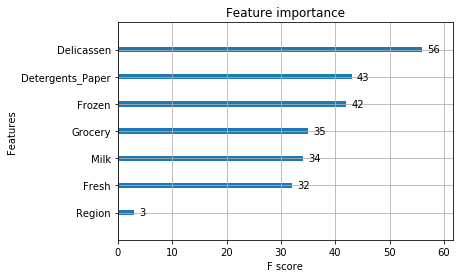

<Figure size 1152x864 with 0 Axes>

In [21]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16, 12))
plt.show()

- We can see that the feature `Delicassesn` has been given the highest importance score among all the features. 

- Based upon this importance score, we can select the features with highest importance score and discard the redundant ones.

- Thus XGBoost also gives us a way to do feature selection.

# **7. Results and Conclusion** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)


- In this kernel, we implement XGBoost with Python and Scikit-Learn to classify the customers from two different channels as Horeca (Hotel/Retail/Café) customers or Retail channel (nominal) customers.

- The y labels contain values as 1 and 2. We have converted them into 0 and 1 for further analysis.

- We have trained the XGBoost classifier and found the accuracy score to be 91.67%.

- We have performed k-fold cross-validation with XGBoost.

- We have find the most important feature in XGBoost. We did it using the plot_importance() function in XGBoost that helps us to achieve this task.



# **8. References** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)


The ideas and concepts in this kernel are taken from the following websites -

-	https://www.datacamp.com/community/tutorials/xgboost-in-python

-	https://blog.cambridgespark.com/getting-started-with-xgboost-3ba1488bb7d4

-	https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7

-	https://heartbeat.fritz.ai/boosting-your-machine-learning-models-using-xgboost-d2cabb3e948f

-	https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d

-   https://medium.com/@gabrieltseng/gradient-boosting-and-xgboost-c306c1bcfaf5

-   https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d

So, now we will come to the end of this kernel.

I hope you find this kernel useful and enjoyable.

Your comments and feedback are most welcome.

Thank you


[Go to Top](#0)